# Multiclass Remote sensing Semantic Segmentation

In [14]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

3.5.0
2.15.0


In [15]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 858.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "a

In [2]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 523.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.5.0 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Structure

In [2]:
# FloodNet-Challenge/
# │
# ├── Train/
# │   ├── Labeled/
# │   │   ├── Flooded/
# │   │   │   ├── image/            # Labeled flooded images
# │   │   │   ├── mask/             # Corresponding flood masks
# │   │   ├── Non-Flooded/
# │   │   │   ├── image/            # Labeled non-flooded images
# │   │   │   ├── mask/             # Corresponding non-flood masks
# │   ├── Unlabeled/
# │   │   ├── image/                # Unlabeled images (no masks)
# │
# ├── Validation/
# │   ├── image/                    # Validation images (no masks for validation)
# │
# ├── Test/
# │   ├── image/                    # Test images (no masks for test)
# │
# └── class_mapping.csv              # Class mapping for the segmentation task

## Accessing the Dataset in Google Drive

In [2]:
import os

# Define paths to the dataset directories
dataset_path = '/content/drive/My Drive/FloodNet-Challenge'

# Paths to labeled, unlabeled, validation, and test data
train_labeled_flooded_images = os.path.join(dataset_path, 'Train/Labeled/Flooded/image')
train_labeled_flooded_masks = os.path.join(dataset_path, 'Train/Labeled/Flooded/mask')

train_labeled_nonflooded_images = os.path.join(dataset_path, 'Train/Labeled/Non-Flooded/image')
train_labeled_nonflooded_masks = os.path.join(dataset_path, 'Train/Labeled/Non-Flooded/mask')

train_unlabeled_images = os.path.join(dataset_path, 'Train/Unlabeled/image')

val_images = os.path.join(dataset_path, 'Validation/image')
test_images = os.path.join(dataset_path, 'Test/image')

# Example of accessing images
print("Labeled Flooded Images:", os.listdir(train_labeled_flooded_images))
print("Unlabeled Images:", os.listdir(train_unlabeled_images))

Labeled Flooded Images: ['6279.jpg', '7463.jpg', '7325.jpg', '7587.jpg', '7202.jpg', '7372.jpg', '7523.jpg', '7357.jpg', '7298.jpg', '7261.jpg', '7267.jpg', '7556.jpg', '7434.jpg', '7364.jpg', '7332.jpg', '7330.jpg', '7266.jpg', '6706.jpg', '9003.jpg', '7317.jpg', '10165.jpg', '6618.jpg', '7405.jpg', '7524.jpg', '6614.jpg', '10166.jpg', '7289.jpg', '7331.jpg', '7594.jpg', '7485.jpg', '7273.jpg', '6716.jpg', '7199.jpg', '7321.jpg', '7466.jpg', '6704.jpg', '7362.jpg', '7243.jpg', '7414.jpg', '6707.jpg', '7488.jpg', '7418.jpg', '6615.jpg', '8408.jpg', '9000.jpg', '7571.jpg', '8379.jpg', '7473.jpg', '7240.jpg', '6703.jpg', '7428.jpg']
Unlabeled Images: ['7328.jpg', '7272.jpg', '7465.jpg', '9008.jpg', '7542.jpg', '7614.jpg', '7366.jpg', '7580.jpg', '7737.jpg', '7568.jpg', '7239.jpg', '6610.jpg', '7547.jpg', '7429.jpg', '7603.jpg', '7410.jpg', '6616.jpg', '7454.jpg', '6708.jpg', '7452.jpg', '8996.jpg', '7439.jpg', '8998.jpg', '7316.jpg', '6710.jpg', '7462.jpg', '7521.jpg', '7242.jpg', '7560.

## Displaying Three Images with Masks

Flooded images:


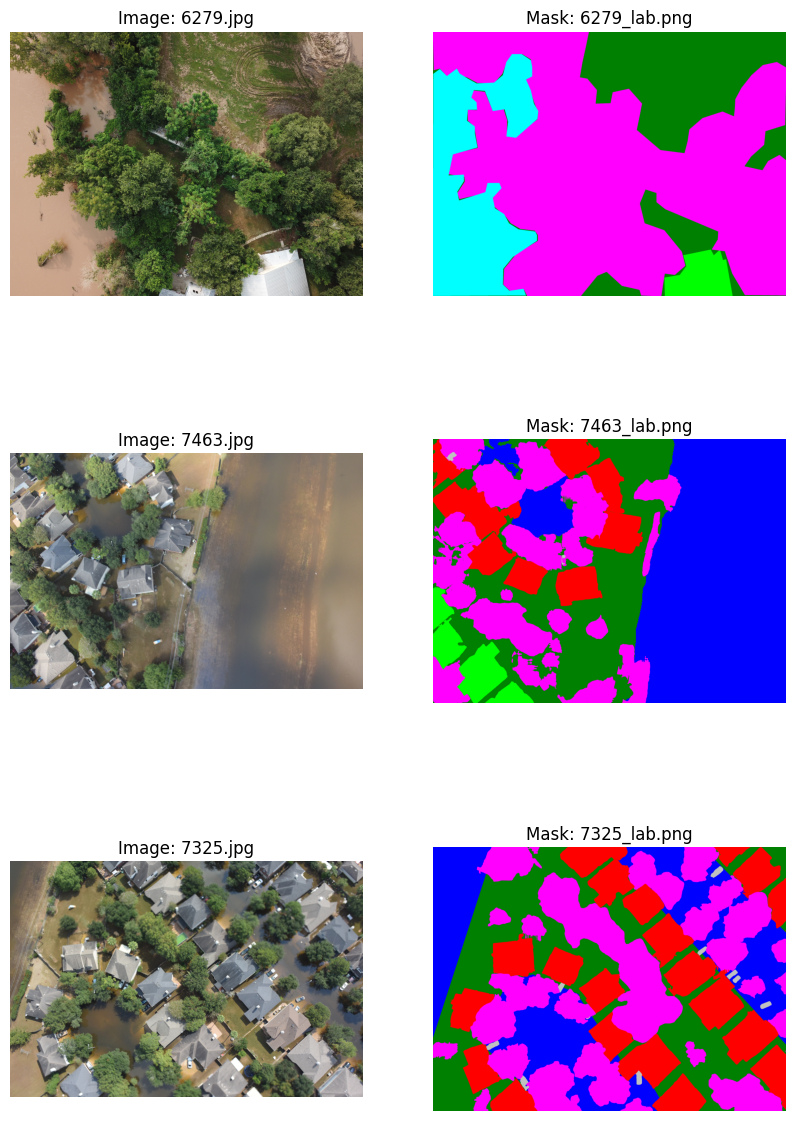

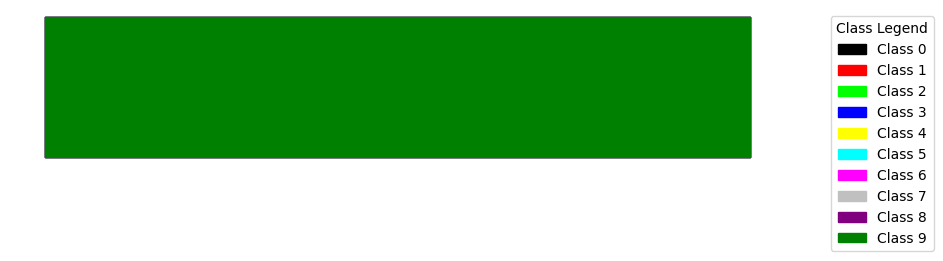

Non-flooded images:


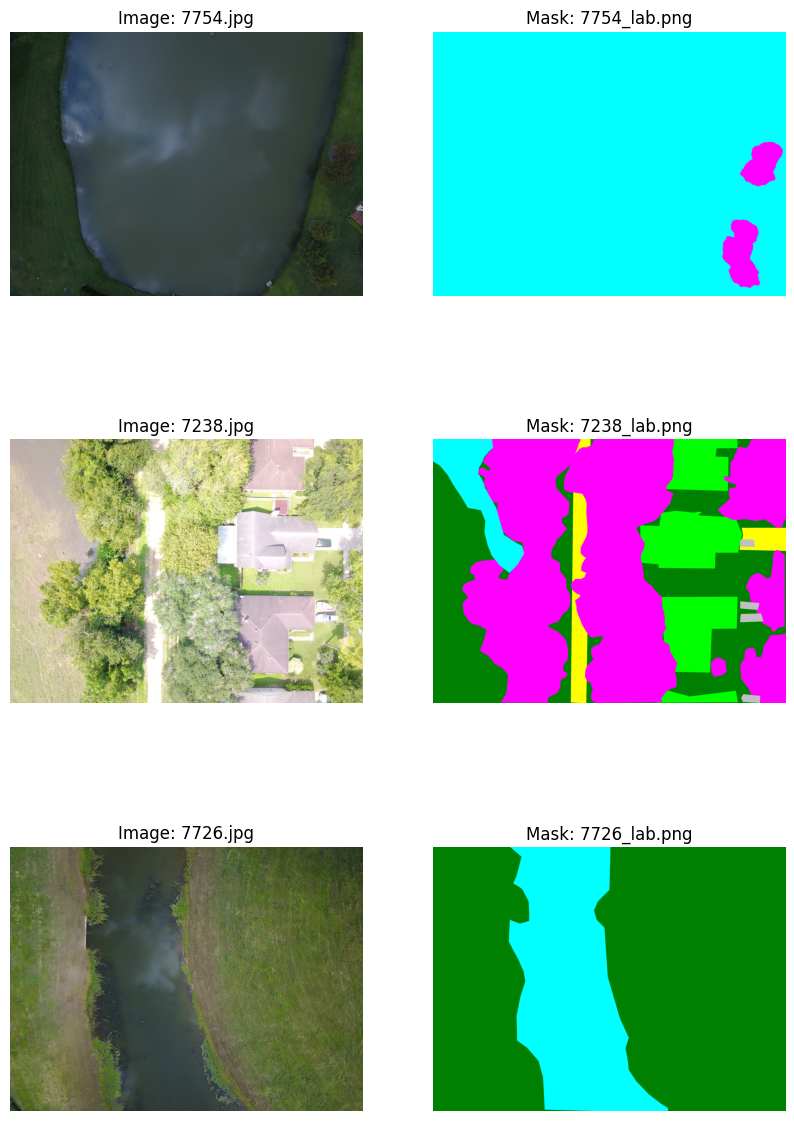

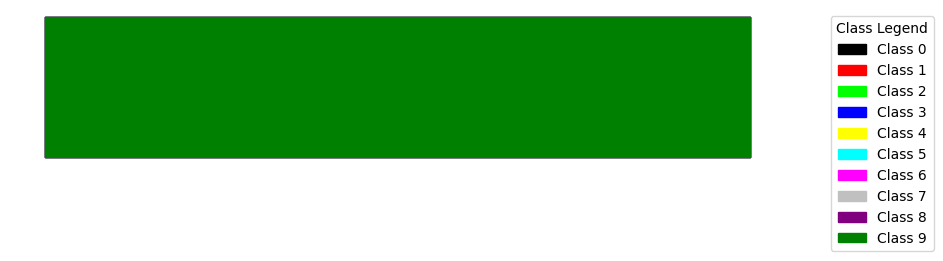

Unlabeled images (only images):


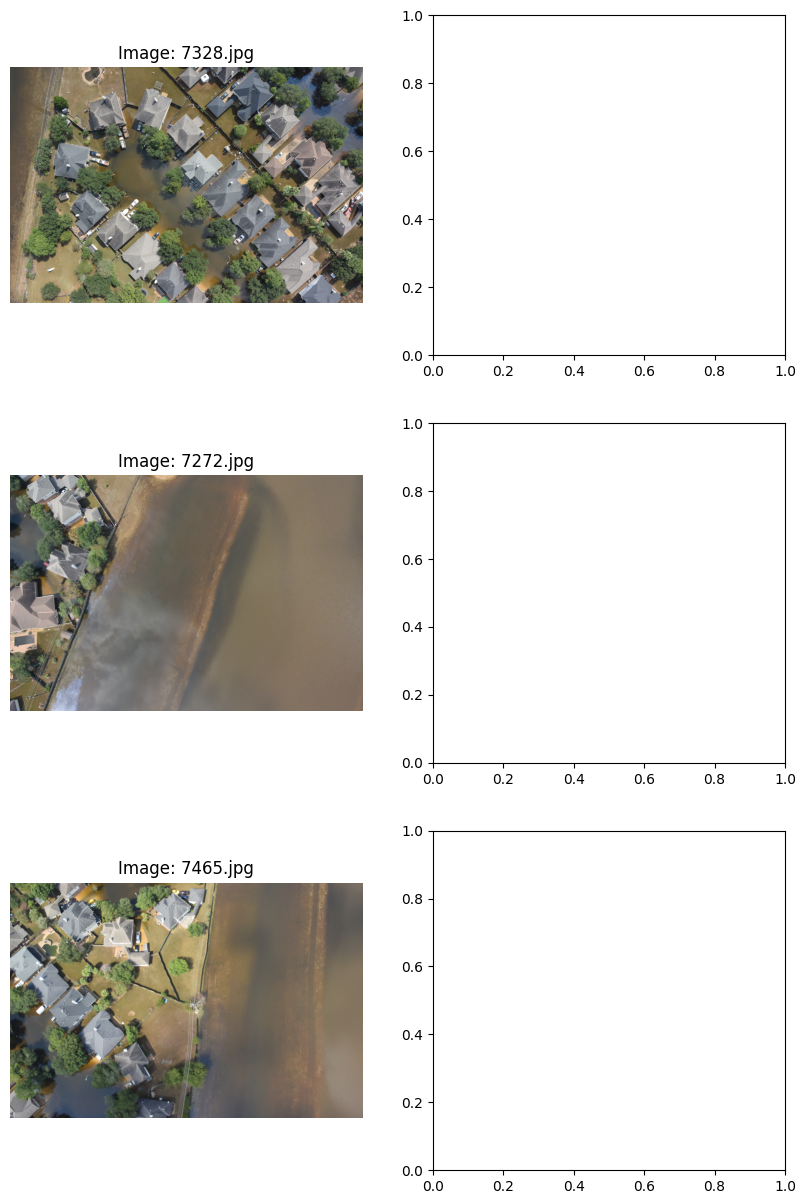

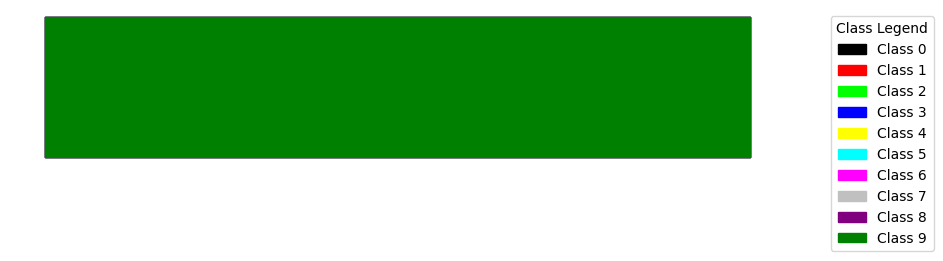

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the class colors
class_colors = {
    0: (0, 0, 0),          # Background
    1: (255, 0, 0),        # Building-flooded (Red)
    2: (0, 255, 0),        # Building-non-flooded (Green)
    3: (0, 0, 255),        # Road-flooded (Blue)
    4: (255, 255, 0),      # Road-non-flooded (Yellow)
    5: (0, 255, 255),      # Water (Cyan)
    6: (255, 0, 255),      # Tree (Magenta)
    7: (192, 192, 192),     # Vehicle (Gray)
    8: (128, 0, 128),       # Pool (Purple)
    9: (0, 128, 0),         # Grass (Dark Green)
}

# Function to colorize masks
def colorize_mask(mask):
    color_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for class_index, color in class_colors.items():
        color_mask[mask == class_index] = color
    return color_mask

# Function to load and display images and masks side by side (for labeled data)
def explore_images(image_dir, mask_dir=None, num_images=3, mask_suffix="_lab.png"):
    image_files = os.listdir(image_dir)[:num_images]

    # Create a grid for images and masks
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

    for idx, img_file in enumerate(image_files):
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path)

        # Display the image
        axes[idx, 0].imshow(img)
        axes[idx, 0].set_title(f"Image: {img_file}", fontsize=12)
        axes[idx, 0].axis('off')

        # Display the corresponding mask if available
        if mask_dir:
            mask_file = img_file.replace('.jpg', mask_suffix)
            mask_path = os.path.join(mask_dir, mask_file)

            if os.path.exists(mask_path):  # Ensure the mask exists before trying to load it
                mask = Image.open(mask_path)
                mask_array = np.array(mask)

                # Colorize the mask
                colored_mask = colorize_mask(mask_array)

                axes[idx, 1].imshow(colored_mask)
                axes[idx, 1].set_title(f"Mask: {mask_file}", fontsize=12)
                axes[idx, 1].axis('off')
            else:
                axes[idx, 1].set_title(f"No mask found for {img_file}", fontsize=12)
                axes[idx, 1].axis('off')

    # Add a legend for the class colors
    plt.figure(figsize=(10, 2))
    for class_index, color in class_colors.items():
        plt.fill_between([0, 1], 0, 1, color=np.array(color) / 255.0, label=f"Class {class_index}")
    plt.legend(title="Class Legend", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.axis('off')
    plt.show()

# Function to explore data structure
def data_exploration():
    print("Flooded images:")
    explore_images(train_labeled_flooded_images, train_labeled_flooded_masks)

    print("Non-flooded images:")
    explore_images(train_labeled_nonflooded_images, train_labeled_nonflooded_masks)

    print("Unlabeled images (only images):")
    explore_images(train_unlabeled_images, mask_dir=None)

# Main function for data exploration
if __name__ == "__main__":
    # Explore the data (view some images and masks side by side)
    data_exploration()


## Utility Functions

In [4]:
import os
from PIL import Image

# Function to check image formats and sizes
def check_images(image_dir):
    image_formats = {}
    image_sizes = {}
    total_images = 0

    for root, dirs, files in os.walk(image_dir):
        for file in files:
            file_path = os.path.join(root, file)

            # Check image extension and open the file
            try:
                with Image.open(file_path) as img:
                    format = img.format  
                    size = img.size     

                    # Update format count
                    if format in image_formats:
                        image_formats[format] += 1
                    else:
                        image_formats[format] = 1

                    # Update size count
                    if size in image_sizes:
                        image_sizes[size] += 1
                    else:
                        image_sizes[size] = 1

                    total_images += 1

            except Exception as e:
                print(f"Error opening {file_path}: {e}")

    # Output the results
    print(f"Results for {image_dir}:")
    print(f"Total images checked: {total_images}")
    print("Image formats:")
    for format, count in image_formats.items():
        print(f" - {format}: {count} images")
    print("Image sizes:")
    for size, count in image_sizes.items():
        print(f" - {size}: {count} images")
    print()

# Recheck the image directories 
check_images(train_labeled_flooded_images)
check_images(train_labeled_flooded_masks)
check_images(train_labeled_nonflooded_images)
check_images(train_labeled_nonflooded_masks)
check_images(train_unlabeled_images)
check_images(val_images)
check_images(test_images)

Results for /content/drive/My Drive/FloodNet-Challenge/Train/Labeled/Flooded/image:
Total images checked: 51
Image formats:
 - MPO: 51 images
Image sizes:
 - (4000, 3000): 9 images
 - (4592, 3072): 42 images

Results for /content/drive/My Drive/FloodNet-Challenge/Train/Labeled/Flooded/mask:
Total images checked: 51
Image formats:
 - PNG: 51 images
Image sizes:
 - (4000, 3000): 51 images



KeyboardInterrupt: 

In [5]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

# Define image size
IMG_HEIGHT, IMG_WIDTH = 256, 256
NUM_CLASSES = 10  

# Function to load and resize images and masks
def load_data(image_dir, mask_dir=None, img_height=IMG_HEIGHT, img_width=IMG_WIDTH, mask_suffix="_lab.png"):
    image_files = sorted(os.listdir(image_dir))
    images = []
    masks = []

    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        img = Image.open(img_path).resize((img_width, img_height))
        images.append(np.array(img))

        if mask_dir is not None:  # Only load masks if mask_dir is provided
            mask_file = img_file.replace('.jpg', mask_suffix)
            mask_path = os.path.join(mask_dir, mask_file)
            if os.path.exists(mask_path):
                mask = Image.open(mask_path).resize((img_width, img_height), Image.NEAREST)
                masks.append(np.array(mask))

    images = np.array(images) / 255.0  # Normalize images

    if mask_dir is not None:
        masks = np.array(masks)
    else:
        masks = None  # Return None for masks if not provided

    return images, masks


# Load training data
train_images_flooded, train_masks_flooded = load_data(train_labeled_flooded_images, train_labeled_flooded_masks)
train_images_nonflooded, train_masks_nonflooded = load_data(train_labeled_nonflooded_images, train_labeled_nonflooded_masks)

# Combine the flooded and non-flooded data
train_images = np.concatenate([train_images_flooded, train_images_nonflooded], axis=0)
train_masks = np.concatenate([train_masks_flooded, train_masks_nonflooded], axis=0)


## Methed 1: Unet Model


### Implementation Steps:

- Train Initial Model: Training the Unet model on the labeled data and evaluate its performance.

- Apply Pseudo-Labeling: Using the Unet trained model to generate pseudo-labels for the unlabeled images.

- Adding these pseudo-labeled images back into the training set and retrain the model.

- Test The Model: We run the model on the test dataset to generate segmentation masks.



In [6]:
# Dice loss function
def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1, 2, 3))
    denominator = tf.reduce_sum(y_true + y_pred, axis=(1, 2, 3))
    return 1 - numerator / denominator

# Combined loss: Dice loss + Categorical Cross-Entropy
def combined_loss(y_true, y_pred):
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    return cce(y_true, y_pred) + dice_loss(tf.one_hot(tf.cast(y_true, tf.int32), NUM_CLASSES), tf.nn.softmax(y_pred))

# U-Net model function
def unet_model(input_size=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=NUM_CLASSES):
    inputs = tf.keras.layers.Input(input_size)
    # Encoder
    conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up7 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(pool2)
    up7 = tf.keras.layers.concatenate([up7, conv2], axis=-1)
    conv7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = tf.keras.layers.concatenate([up8, conv1], axis=-1)
    conv8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(conv8)
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])
    return model

# Instantiate the model
model = unet_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 128, 128, 128)  │         65,664 │ max_pooling2d_1[0][0]  │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 256)  │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 128)  │        295,040 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 256, 256, 64)   │         32,832 │ conv2d_5[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256, 256, 128)  │              0 │ conv2d_transpose_1[0]… │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 256, 256, 64)   │         73,792 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 256, 256, 10)   │            650 │ conv2d_7[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 912,650 (3.48 MB)

 Trainable params: 912,650 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print("Train images shape:", train_images.shape, "dtype:", train_images.dtype)
print("Train masks shape:", train_masks.shape, "dtype:", train_masks.dtype)

Train images shape: (398, 256, 256, 3) dtype: float64
Train masks shape: (398, 256, 256) dtype: uint8


In [8]:
model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])

In [9]:
# Train the model
model.fit(train_images, train_masks, batch_size=16, epochs=10, validation_split=0.1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.5174 - loss: 2.8586 - val_accuracy: 0.4231 - val_loss: 2.6539
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.6004 - loss: 2.1354 - val_accuracy: 0.4231 - val_loss: 2.4676
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.5890 - loss: 2.0611 - val_accuracy: 0.4257 - val_loss: 2.4239
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.5967 - loss: 1.9786 - val_accuracy: 0.4258 - val_loss: 2.4466
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.6027 - loss: 1.9834 - val_accuracy: 0.4575 - val_loss: 2.3289
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.6280 - loss: 1.8936 - val_accuracy: 0.5531 - val_loss: 2.2174
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.6444 - loss: 1.8512 - val_accuracy: 0.4659 - val_loss: 2.3082
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.6253 - loss: 1.8834 - val_accuracy: 0.4765 - v

In [10]:
# Save the trained model
model.save('/content/drive/MyDrive/FloodNet-Challenge/unet_model_labeled_2.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the saved model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/FloodNet-Challenge/unet_model_labeled_2.keras', custom_objects={'combined_loss': combined_loss})

In [12]:
# Load unlabeled images
unlabeled_images, _ = load_data(train_unlabeled_images, mask_dir=None)

# Predict pseudo-labels
pseudo_labels = model.predict(unlabeled_images)
pseudo_labels_argmax = np.argmax(pseudo_labels, axis=-1)

# Combine pseudo-labeled data with the original training data
combined_images = np.concatenate([train_images, unlabeled_images], axis=0)
combined_masks = np.concatenate([train_masks, pseudo_labels_argmax], axis=0)

33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


In [13]:
# Retrain the model
model.fit(combined_images, combined_masks, batch_size=16, epochs=3, validation_split=0.1)

Epoch 1/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 408s 5s/step - accuracy: 0.8457 - loss: 1.3560 - val_accuracy: 0.9145 - val_loss: 1.1460
Epoch 2/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.8366 - loss: 1.3686 - val_accuracy: 0.8351 - val_loss: 1.2550
Epoch 3/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 406s 5s/step - accuracy: 0.8464 - loss: 1.3291 - val_accuracy: 0.8928 - val_loss: 1.1496


In [14]:
# Save the updated model
model.save('/content/drive/MyDrive/FloodNet-Challenge/unet_model_combined_2.keras')

In [16]:
# Load the updated model if needed
model = load_model('/content/drive/MyDrive/FloodNet-Challenge/unet_model_combined_2.keras', custom_objects={'combined_loss': combined_loss})

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Function to load and preprocess images with correct size
def load_images_from_directory(directory, image_size=(256, 256)): 
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=image_size)  
        img_array = img_to_array(img)
        images.append(img_array)

    return np.array(images)

# Load test images with correct size
test_images_dir = '/content/drive/My Drive/FloodNet-Challenge/Test/image'
test_images = load_images_from_directory(test_images_dir, image_size=(256, 256)) 

# Normalize image data 
test_images = test_images / 255.0

# Test the model on the loaded test images
test_predictions = model.predict(test_images)


14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


## Displaying Three Images with Masks from the Predictions

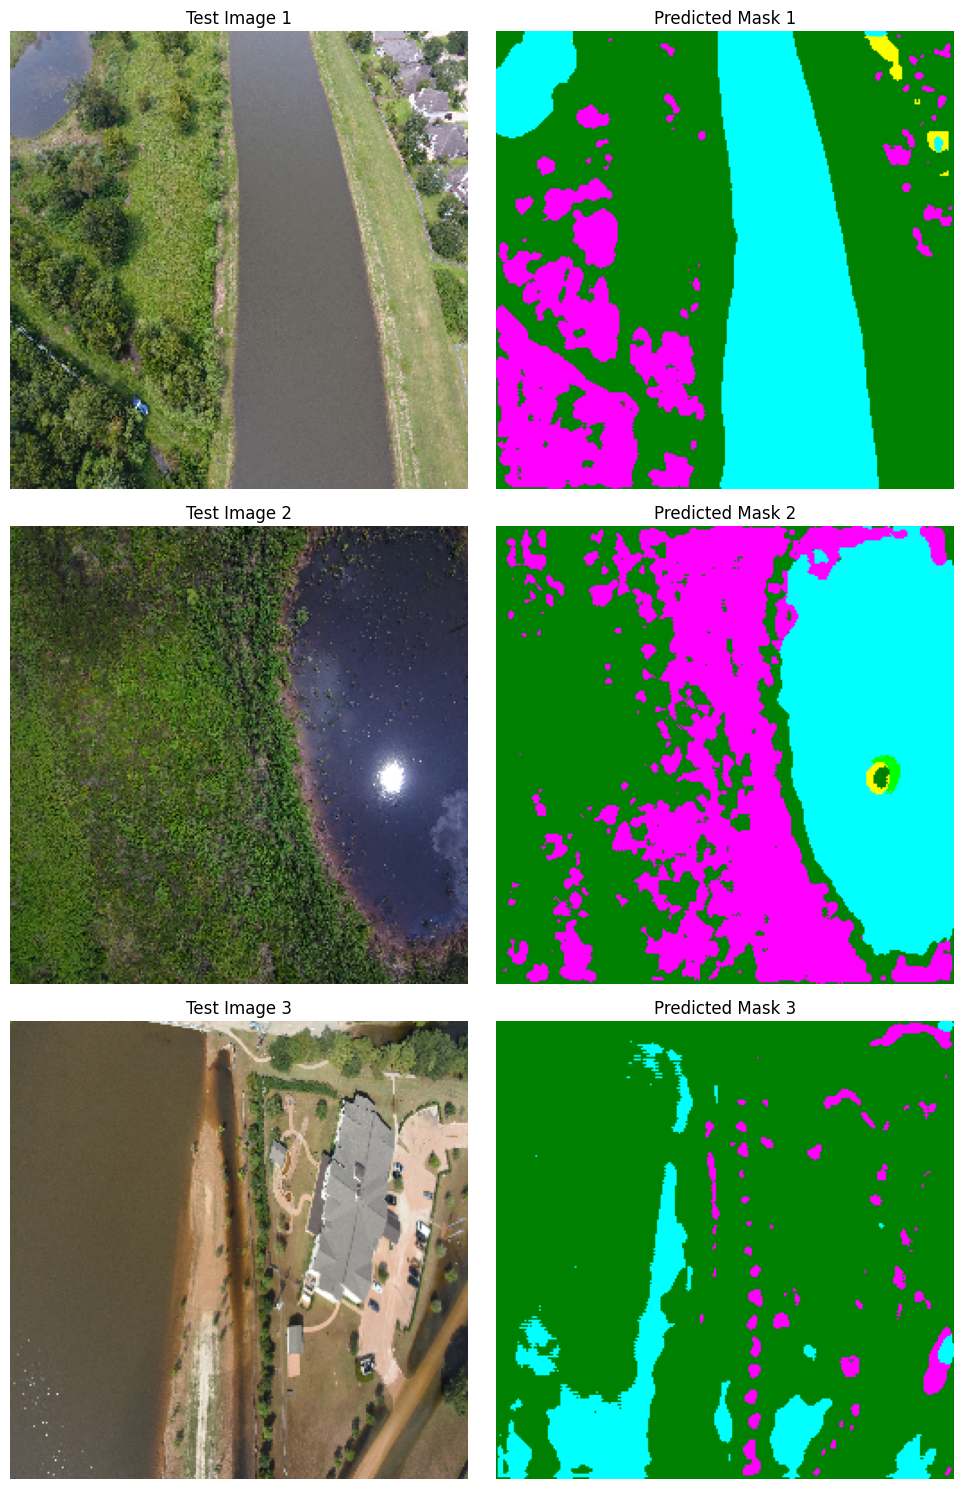

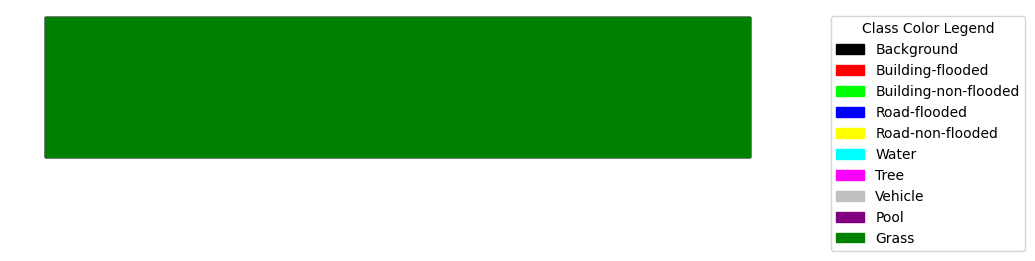

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class_labels = {
    0: 'Background',
    1: 'Building-flooded',
    2: 'Building-non-flooded',
    3: 'Road-flooded',
    4: 'Road-non-flooded',
    5: 'Water',
    6: 'Tree',
    7: 'Vehicle',
    8: 'Pool',
    9: 'Grass'
}

# Function to colorize predictions
def colorize_predictions(predictions, class_colors):
    color_predictions = []
    for pred in predictions:
        pred_mask = np.argmax(pred, axis=-1)  
        color_pred = np.zeros((*pred_mask.shape, 3), dtype=np.uint8)
        for class_index, color in class_colors.items():
            color_pred[pred_mask == class_index] = color
        color_predictions.append(color_pred)
    return np.array(color_predictions)

# Updated function to load and display images, predictions, and the class color legend
def explore_images(images, predictions=None, num_images=3):
    num_images = min(num_images, len(images))  # Ensure we don't exceed available images

    # Create a grid for images and their predictions
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

    for idx in range(num_images):
        img = images[idx]

        # Display the image
        axes[idx, 0].imshow(img)
        axes[idx, 0].set_title(f"Test Image {idx + 1}", fontsize=12)
        axes[idx, 0].axis('off')

        # Display the corresponding prediction if available
        if predictions is not None:
            pred = predictions[idx]
            pred_colored = colorize_predictions([pred], class_colors)[0]  # Colorize the prediction

            axes[idx, 1].imshow(pred_colored)
            axes[idx, 1].set_title(f"Predicted Mask {idx + 1}", fontsize=12)
            axes[idx, 1].axis('off')

    plt.tight_layout()

    # Add a separate figure for the legend
    plt.figure(figsize=(10, 2))
    for class_index, color in class_colors.items():
        plt.fill_between([0, 1], 0, 1, color=np.array(color) / 255.0, label=f"{class_labels[class_index]}")
    plt.legend(title="Class Color Legend", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.axis('off')
    plt.show()

# Explore test images and their predictions
explore_images(test_images, predictions=test_predictions)


## Method 2: Transfer Learning

### Implementation Steps:
